In [15]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoLarsCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("carDataClean.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32596 entries, 0 to 32595
Data columns (total 19 columns):
price             32596 non-null int64
miles             32596 non-null int64
fuel_type         32596 non-null object
exterior_color    32357 non-null object
interior_color    28987 non-null object
drivetrain        32596 non-null object
transmission      32596 non-null object
engine            32596 non-null object
VIN               32594 non-null object
name              32596 non-null object
sellerAddress     32596 non-null object
id                32596 non-null int64
modelName         32596 non-null object
diesel            32596 non-null bool
turbo             32596 non-null bool
hybrid            32596 non-null bool
used              32596 non-null bool
year              32596 non-null int64
make              32596 non-null object
dtypes: bool(4), int64(4), object(11)
memory usage: 3.9+ MB


In [4]:
print(df['drivetrain'].unique())
print(df['transmission'].unique())

['FWD' 'RWD' '4WD']
['CVT' 'Auto' 'Manual']


In [5]:
# Convert catagorial data into number
drivetrain_map = {'FWD' : 0, 'RWD' : 1, '4WD' : 2}
drivetrain_numeric = [drivetrain_map[dt] for dt in df['drivetrain']]

tranmission_map = {'CVT' : 0, 'Auto': 1, "Manual": 2}
transmission_numeric = [tranmission_map[tr] for tr in df['transmission']]

engine_map = {'V12' : 12, 'V10': 10, 'V8': 8, 'V6': 6, 'V5': 5, 'V4': 4, 'V3': 3}
engine_numeric = [engine_map[en] for en in df['engine']]

diesel_numeric = [1 if d else 0 for d in df['diesel']]

turbo_numeric = [1 if d else 0 for d in df['turbo']]

hybrid_numeric = [1 if d else 0 for d in df['hybrid']]

model_map = {
    "C-Max Energi":50243, "C-Max Hybrid":49085, "Crown Victoria":20906, "E150":21050,
    "E250":26506, "E350":26502, "E350 Super Duty":26507, "EcoSport":36284899,
    "Edge":21039, "Escape":21088, "Excursion":21102, "Expedition":21104,
    "Expedition EL":21085, "Expedition Max":36324071, "Explorer":21105, "Explorer Sport Trac":21107,
    "F-150":21095, "F-250":21115, "F-350":21097, "Fiesta":21146, "Five Hundred":21156, "Flex":21136,
    "Focus":21138, "Focus ST":48704, "Freestar":21169, "Freestyle":21144, "Fusion":21175, "Fusion Energi":53027,
    "Fusion Hybrid":27661, "Mustang":21712, "Probe":21752, "Ranger":21874, "Sedan Police Interceptor":57387,
    "Shelby GT350":30021281, "Taurus":22164, "Thunderbird":22263, "Transit Connect":28203,
    "Transit-150":56747, "Transit-250":56748, "Transit-350":56749, "Model Unknown":29629
}
model_numeric = [model_map[md] for md in df['modelName']]

In [6]:
# Build datapoints we 
X = df.loc[:,['year', 'miles']]
X['model'] = model_numeric
X['transmission'] = transmission_numeric
X['engine'] = engine_numeric
X['turbo'] = turbo_numeric
X['diesel'] = diesel_numeric
X['hybrid'] = hybrid_numeric
X['drivetrain'] = drivetrain_numeric
Y = df['price']

# Create 80-20 test split for training models and testing
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size=0.2)

In [7]:
# K-Neighbors Regresssion

kneighbors_reg = KNeighborsRegressor().fit(X_Train, Y_Train)

# Find the scores of the regression
kneighbors_r2_score = kneighbors_reg.score(X_Test, Y_Test)
kneighbors_ma_error = model_selection.cross_val_score(kneighbors_reg, X_Test, Y_Test, scoring='neg_mean_absolute_error')
kneighbors_ms_error = model_selection.cross_val_score(kneighbors_reg, X_Test, Y_Test, scoring='neg_mean_squared_error')

print('KNeighbors regression: R^2 Score: ' + str(kneighbors_r2_score))
print('KNeighbors regression: Mean Absolute Error: ' + str(kneighbors_ma_error.mean()))
print('KNeighbors regression: Mean Squared Error: ' + str(kneighbors_ms_error.mean()))
print('KNeighbors regression: Root Mean Squared Error: ' + str(math.sqrt(abs(kneighbors_ms_error.mean()))))

KNeighbors regression: R^2 Score: 0.7176371524590852
KNeighbors regression: Mean Absolute Error: -6342.060712843767
KNeighbors regression: Mean Squared Error: -83479854.47284727
KNeighbors regression: Root Mean Squared Error: 9136.73106055154


In [8]:
# Lasso Regresssion

lasso_reg = LassoLarsCV(cv=3, max_n_alphas = 10).fit(X_Train, Y_Train)

# Find the scores of the regression
lasso_r2_score = lasso_reg.score(X_Test, Y_Test)
lasso_ma_error = model_selection.cross_val_score(lasso_reg, X_Test, Y_Test, scoring='neg_mean_absolute_error')
lasso_ms_error = model_selection.cross_val_score(lasso_reg, X_Test, Y_Test, scoring='neg_mean_squared_error')

print('Lasso regression: R^2 Score: ' + str(lasso_r2_score))
print('Lasso regression: Mean Absolute Error: ' + str(lasso_ma_error.mean()))
print('Lasso regression: Mean Squared Error: ' + str(lasso_ms_error.mean()))
print('Lasso regression: Root Mean Squared Error: ' + str(math.sqrt(abs(lasso_ms_error.mean()))))

Lasso regression: R^2 Score: 0.7520189811869492
Lasso regression: Mean Absolute Error: -5676.5626716614715
Lasso regression: Mean Squared Error: -60458424.03146461
Lasso regression: Root Mean Squared Error: 7775.501529256142


In [9]:
# Random Forest Regresssion

rf_reg = RandomForestRegressor().fit(X_Train, Y_Train)

# Find the scores of the regression
rf_r2_score = rf_reg.score(X_Test, Y_Test)
rf_ma_error = model_selection.cross_val_score(rf_reg, X_Test, Y_Test, scoring='neg_mean_absolute_error')
rf_ms_error = model_selection.cross_val_score(rf_reg, X_Test, Y_Test, scoring='neg_mean_squared_error')

print('Random Forest regression: R^2 Score: ' + str(rf_r2_score))
print('Random Forest regression: Mean Absolute Error: ' + str(rf_ma_error.mean()))
print('Random Forest regression: Mean Squared Error: ' + str(rf_ms_error.mean()))
print('Random Forest regression: Root Mean Squared Error: ' + str(math.sqrt(abs(rf_ms_error.mean()))))

Random Forest regression: R^2 Score: 0.9015173838721239
Random Forest regression: Mean Absolute Error: -3499.423556945198
Random Forest regression: Mean Squared Error: -29121786.390800375
Random Forest regression: Root Mean Squared Error: 5396.460542874411


In [13]:
# Linear Regresssion

linear_reg = LinearRegression().fit(X_Train, Y_Train)

# Find the scores of the regression
linear_r2_score = linear_reg.score(X_Test, Y_Test)
linear_ma_error = model_selection.cross_val_score(linear_reg, X_Test, Y_Test, scoring='neg_mean_absolute_error')
linear_ms_error = model_selection.cross_val_score(linear_reg, X_Test, Y_Test, scoring='neg_mean_squared_error')

print('Linear regression: R^2 Score: ' + str(linear_r2_score))
print('Linear regression: Mean Absolute Error: ' + str(linear_ma_error.mean()))
print('Linear regression: Mean Squared Error: ' + str(linear_ma_error.mean()))
print('Linear regression: Root Mean Squared Error: ' + str(math.sqrt(abs(linear_ms_error.mean()))))

Linear regression: R^2 Score: 0.752018981186948
Linear regression: Mean Absolute Error: -5676.562671661494
Linear regression: Mean Squared Error: -5676.562671661494
Linear regression: Root Mean Squared Error: 7775.501529256169


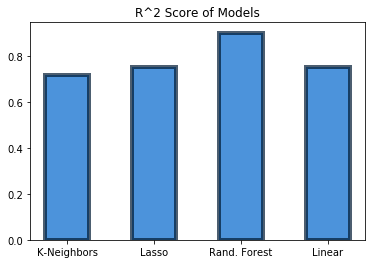

In [45]:
r2_scores = [kneighbors_r2_score, lasso_r2_score, rf_r2_score, linear_r2_score]

plt.title('R^2 Score of Models')
plt.bar(['K-Neighbors', 'Lasso', 'Rand. Forest', 'Linear'], r2_scores, .5, 
        color='#0066cc', edgecolor="#001a33", linewidth=4, alpha=0.7)
plt.show()

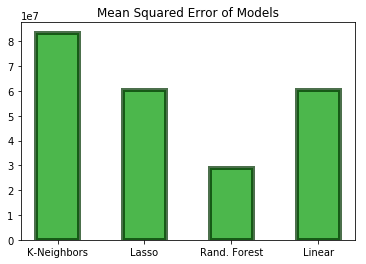

In [44]:
r2_scores = [abs(kneighbors_ms_error.mean()), abs(lasso_ms_error.mean()), abs(rf_ms_error.mean()), abs(linear_ms_error.mean())]

plt.title('Mean Squared Error of Models')
plt.bar(['K-Neighbors', 'Lasso', 'Rand. Forest', 'Linear'], r2_scores, .5, 
        color='#009900', edgecolor="#003300", linewidth=4, alpha=0.7)
plt.show()

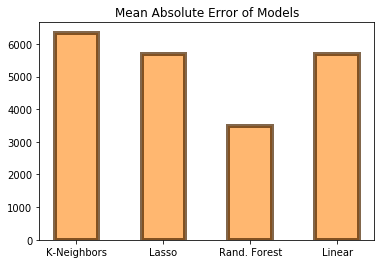

In [43]:
r2_scores = [abs(kneighbors_ma_error.mean()), abs(lasso_ma_error.mean()), abs(rf_ma_error.mean()), abs(linear_ma_error.mean())]

plt.title('Mean Absolute Error of Models')
plt.bar(['K-Neighbors', 'Lasso', 'Rand. Forest', 'Linear'], r2_scores, .5, 
        color='#ff9933', edgecolor="#4d2600", linewidth=4, alpha=0.7)
plt.show()

In [47]:
year = float(input('What year?: '))
miles = float(input('How many miles?: '))
model = float(model_map[input('What model?: ')])
trans = float(tranmission_map[input('What transmission type (CVT/Auto/Manual?: ')])
engine = float(engine_map[input('What engine size (V#)?: ')])
turbo = float(input('Does it have a turbo (0:false/1:true)?: '))
diesel = float(input('Is it diesel (0:false/1:true)?: '))
hybrid = float(input('Is it hybrid (0:false/1:true)?: '))
drivetrain = float(drivetrain_map[input('What drivetrain (FWD/RWD/4WD)?: ')])

predicted_price = rf_reg.predict([[year, miles, model, trans, engine, turbo, diesel, hybrid, drivetrain]])
print('The predicted price of this car is: ' + str(predicted_price[0]))

What year?: 2011
How many miles?: 125000
What model?: Fusion
What transmission type (CVT/Auto/Manual?: Auto
What engine size (V#)?: V6
Does it have a turbo (0:false/1:true)?: 0
Is it diesel (0:false/1:true)?: 0
Is it hybrid (0:false/1:true)?: 0
What drivetrain (FWD/RWD/4WD)?: FWD
The predicted price of this car is: 8022.5
